In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import math

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

evaluation_results = {
    'Full System (GPT-4o-mini)': './final/gpt-4o-mini_evaluation_v1.csv',
    'w/o graph (GPT-4o-mini)': './final/gpt-4o-mini_wo_graph_v1.csv',
    'w/o reflection (GPT-4o-mini)': './ablation_wo_ref/gpt-4o-mini_evaluation_v1.csv',
    'w/o graph w/o reflection (GPT-4o-mini)': './ablation_wo_ref/gpt-4o-mini_wo_graph_v1.csv',

    'Full System (GPT-5)': './final/gpt-4o-mini_evaluation_v2.csv',
    'w/o graph (GPT-5)': './final/gpt-4o-mini_wo_graph_v2.csv',
    'w/o reflection (GPT-5)': './ablation_wo_ref/gpt-4o-mini_evaluation_v2.csv',
    'w/o graph w/o reflection (GPT-5)': './ablation_wo_ref/gpt-4o-mini_wo_graph_v2.csv',
    
}

In [44]:
# Score columns to analyze
score_columns = [
    'persuasiveness_score',
    'transparency_score',
    'accuracy_score',
    'satisfaction_score',
    'average_score'
]

# Additional columns to analyze
additional_columns = [
    'final_overall_score',
    'task_confidence'
]

# Load all evaluation results
dfs = {}
for model_name, file_path in evaluation_results.items():
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        # Add model type column
        df['model_type'] = model_name
        
        # Check which columns exist in this dataframe
        available_columns = []
        for col in score_columns + additional_columns:
            if col in df.columns:
                available_columns.append(col)
        
        # Select only available columns and model_type
        dfs[model_name] = df[available_columns + ['model_type']]
        print(f"✅ Loaded {model_name}: {len(df)} samples, columns: {available_columns}")
    except Exception as e:
        print(f"❌ Error loading {model_name}: {e}")

# Combine all dataframes (only with common columns)
common_columns = set(dfs[list(dfs.keys())[0]].columns)
for df in dfs.values():
    common_columns = common_columns.intersection(set(df.columns))

combined_df = pd.concat([df[list(common_columns)] for df in dfs.values()], ignore_index=True)
print(f"\n📊 Total samples loaded: {len(combined_df)}")
print(f"Common columns: {sorted(list(common_columns))}")

✅ Loaded Full System (GPT-4o-mini): 187 samples, columns: ['persuasiveness_score', 'transparency_score', 'accuracy_score', 'satisfaction_score', 'average_score', 'final_overall_score', 'task_confidence']
✅ Loaded w/o graph (GPT-4o-mini): 187 samples, columns: ['persuasiveness_score', 'transparency_score', 'accuracy_score', 'satisfaction_score', 'average_score', 'final_overall_score', 'task_confidence']
✅ Loaded w/o reflection (GPT-4o-mini): 187 samples, columns: ['persuasiveness_score', 'transparency_score', 'accuracy_score', 'satisfaction_score', 'average_score', 'final_overall_score', 'task_confidence']
✅ Loaded w/o graph w/o reflection (GPT-4o-mini): 187 samples, columns: ['persuasiveness_score', 'transparency_score', 'accuracy_score', 'satisfaction_score', 'average_score', 'final_overall_score', 'task_confidence']
✅ Loaded Full System (GPT-5): 187 samples, columns: ['persuasiveness_score', 'transparency_score', 'accuracy_score', 'satisfaction_score', 'average_score', 'final_overall

In [45]:
# Calculate statistics for evaluation summary
statistics = []

for model_name in dfs.keys():
    model_df = dfs[model_name]
    
    stats_dict = {'Model': model_name}
    
    # Analyze score columns
    for col in score_columns:
        if col in model_df.columns:
            mean_val = model_df[col].mean()
            std_val = model_df[col].std()
            stats_dict[f'{col}_mean'] = mean_val
            stats_dict[f'{col}_std'] = std_val
            stats_dict[f'{col}_formatted'] = f"{mean_val:.2f} (±{std_val:.2f})"
    
    # Analyze additional columns
    for col in additional_columns:
        if col in model_df.columns:
            mean_val = model_df[col].mean()
            std_val = model_df[col].std()
            stats_dict[f'{col}_mean'] = mean_val
            stats_dict[f'{col}_std'] = std_val
            stats_dict[f'{col}_formatted'] = f"{mean_val:.2f} (±{std_val:.2f})"
    
    statistics.append(stats_dict)

# Create summary dataframe
summary_df = pd.DataFrame(statistics)

# Display formatted summary table
print("📈 Evaluation Summary (Mean ± Std)")
print("="*100)

# Prepare display columns (only those that exist)
display_columns = ['Model']
for col in score_columns + additional_columns:
    if f'{col}_formatted' in summary_df.columns:
        display_columns.append(f'{col}_formatted')

display_df = summary_df[display_columns].copy()

# Rename columns for better display
new_column_names = ['Model']
for col in display_columns[1:]:
    new_name = col.replace('_score_formatted', '').replace('_formatted', '').replace('_', ' ').title()
    new_column_names.append(new_name)

display_df.columns = new_column_names
print(display_df.to_string(index=False))

📈 Evaluation Summary (Mean ± Std)
                                 Model Persuasiveness Transparency     Accuracy Satisfaction      Average  Final Overall Task Confidence
             Full System (GPT-4o-mini)   4.12 (±0.94) 4.70 (±0.58) 3.73 (±0.64) 4.11 (±0.93) 4.17 (±0.73)  74.36 (±8.44)   89.84 (±1.26)
               w/o graph (GPT-4o-mini)   3.84 (±1.08) 4.57 (±0.69) 3.59 (±0.75) 3.85 (±1.07) 3.96 (±0.86) 70.50 (±10.48)   89.73 (±1.62)
          w/o reflection (GPT-4o-mini)   4.06 (±1.00) 4.71 (±0.61) 3.73 (±0.73) 4.06 (±1.00) 4.14 (±0.80)  74.36 (±8.44)   89.84 (±1.26)
w/o graph w/o reflection (GPT-4o-mini)   3.64 (±1.26) 4.45 (±0.80) 3.41 (±0.90) 3.63 (±1.25) 3.78 (±1.02) 70.50 (±10.48)   89.73 (±1.62)
                   Full System (GPT-5)   2.19 (±0.84) 2.97 (±0.94) 1.98 (±1.12) 1.93 (±0.92) 2.27 (±0.86)  74.36 (±8.44)   89.84 (±1.26)
                     w/o graph (GPT-5)   1.97 (±0.80) 2.82 (±0.93) 1.81 (±0.99) 1.78 (±0.82) 2.09 (±0.79) 70.50 (±10.48)   89.73 (±1.62)
       

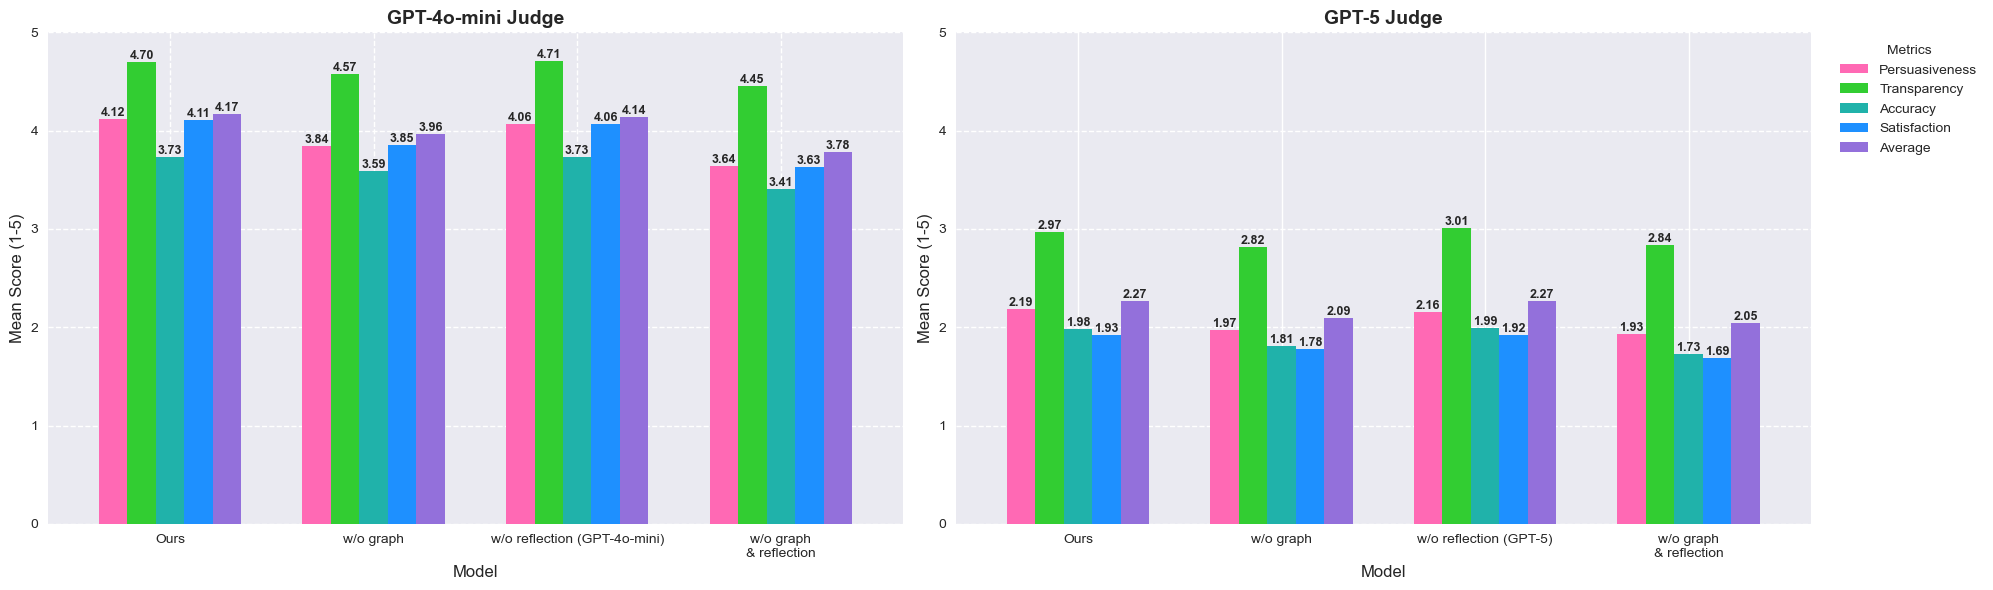

In [46]:
# 최종 w/o reflection 결과
# Create comprehensive comparison charts
# Color scheme matching the reference image
colors = ['#ff69b4', '#32cd32', '#20b2aa', '#1e90ff', '#9370db']  # Pink, Green, Teal, Blue, Purple

# Prepare data for visualization
available_mean_cols = []
for col in score_columns:  # Only LLM judge scores
    if f'{col}_mean' in summary_df.columns:
        available_mean_cols.append(col)

mean_scores = summary_df[['Model'] + [f'{col}_mean' for col in available_mean_cols]].copy()

# Rename columns for better display
new_names = ['Model']
for col in available_mean_cols:
    new_name = col.replace('_score', '').replace('_', ' ').title()
    new_names.append(new_name)
mean_scores.columns = new_names

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Filter data for each evaluation model - Updated to match w/o reflection paths
gpt4o_data = mean_scores[mean_scores['Model'].str.contains('GPT-4o-mini')].copy()
gpt5_data = mean_scores[mean_scores['Model'].str.contains('GPT-5') & ~mean_scores['Model'].str.contains('GPT-4o-mini')].copy()

# Simplify model names - Updated for w/o reflection
gpt4o_data['Model'] = gpt4o_data['Model'].apply(lambda x: 
    'Ours' if x == 'Full System (GPT-4o-mini)' else
    'w/o graph' if x == 'w/o graph (GPT-4o-mini)' else
    'w/o reflection' if 'Full System w/o reflection (GPT-4o-mini)' in x else
    'w/o graph\n& reflection' if 'w/o graph w/o reflection (GPT-4o-mini)' in x else x
)

gpt5_data['Model'] = gpt5_data['Model'].apply(lambda x:
    'Ours' if x == 'Full System (GPT-5)' else
    'w/o graph' if x == 'w/o graph (GPT-5)' else
    'w/o reflection' if 'Full System w/o reflection (GPT-5)' in x else
    'w/o graph\n& reflection' if 'w/o graph w/o reflection (GPT-5)' in x else x
)

# Set Model as index for plotting
gpt4o_data.set_index('Model', inplace=True)
gpt5_data.set_index('Model', inplace=True)

# Select only LLM judge metrics
score_metrics = [col for col in gpt4o_data.columns
                 if any(s in col.lower() for s in
                        ['persuasiveness', 'transparency', 'accuracy', 'satisfaction', 'average'])]

# Plot GPT-4o-mini comparison
if len(gpt4o_data) > 0:
    gpt4o_data[score_metrics].plot(kind='bar', ax=ax1, width=0.7, color=colors)
    ax1.set_title('GPT-4o-mini Judge', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Mean Score (1-5)', fontsize=12)
    ax1.set_xlabel('Model', fontsize=12)
    ax1.set_ylim(0, 5)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')
    ax1.grid(True, alpha=1, linestyle='--', axis='y')
    ax1.grid(True, alpha=1, linestyle='--', axis='x')
    ax1.get_legend().remove()  # Remove legend from left subplot
    
    # Add value labels
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.2f', fontsize=9, fontweight='bold')

# Plot GPT-5 comparison
if len(gpt5_data) > 0:
    gpt5_data[score_metrics].plot(kind='bar', ax=ax2, width=0.7, color=colors)
    ax2.set_title('GPT-5 Judge', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Mean Score (1-5)', fontsize=12)
    ax2.set_xlabel('Model', fontsize=12)
    ax2.set_ylim(0, 5)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
    ax2.grid(True, alpha=1, linestyle='--', axis='y')
    ax2.grid(True, alpha=1, linestyle='--', axis='y')
    ax2.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
    
    # Add value labels
    for container in ax2.containers:
        ax2.bar_label(container, fmt='%.2f', fontsize=9, fontweight='bold')

# Add subtle background color
ax1.set_facecolor('#EAEAF1')
ax2.set_facecolor('#EAEAF1')

plt.tight_layout()
#plt.savefig('../graph_viz/final_eval.png')
plt.show()
